In [ ]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
import numpy as np

all_sky_volume=cosmo.comoving_volume(0.35) - cosmo.comoving_volume(0.3)

In [ ]:
survey_area=(47* u.deg**2) 
all_sky_area=(4 * np.pi * u.steradian).to(u.deg**2)

In [ ]:
all_sky_volume * (survey_area/all_sky_area)


this code gives me the field per night 

In [8]:
import os                                             # import the os module for directory and file operations
import pandas as pd                                   # import pandas for reading and manipulating CSV data

# ——— CONFIG ———
main_directory = '/home/jovyan/research/Current/Field_Numbers'  # path containing subfolders named by field number
jdmin = 2458197                                      # minimum Julian Date in your window
jdmax = 2460695                                      # maximum Julian Date in your window
total_nights = jdmax - jdmin                         # compute the total number of nights in that JD range

# Accumulators
total_unique_field_nights = 0                        # will sum unique-night counts across all fields
fields_processed = 0                                 # will count how many field folders were successfully read

# ——— LOOP OVER EACH FIELD ———
for field in os.listdir(main_directory):             # iterate over every entry name in main_directory
    field_dir = os.path.join(main_directory, field)  # build the full path to this entry
    if not os.path.isdir(field_dir):                 # skip if the entry is not a directory
        continue

    obs_path = os.path.join(field_dir, 'observation.csv')  # expected CSV filename inside each field folder
    if not os.path.isfile(obs_path):                  # if the CSV file doesn’t exist, warn and skip
        print(f"Skipping {field!r}: no observation.csv found")
        continue

    # ——— READ CSV ———
    df = pd.read_csv(obs_path)                        # load the CSV into a pandas DataFrame
    df.columns = ['obsjd', 'maglimit']                # rename columns to obsjd (Julian date) and maglimit

    # ——— TRUNCATE JD TO INTEGER “NIGHTS” ———
    df['night'] = df['obsjd'].astype(int)             # convert each floating‐point JD to its integer part

    # ——— COUNT UNIQUE NIGHTS FOR THIS FIELD ———
    unique_nights = df['night'].nunique()             # count how many distinct integer nights appear
    total_unique_field_nights += unique_nights        # add to the running total of unique field‐nights
    fields_processed += 1                             # increment the count of processed fields

# ——— FINAL CALCULATION & OUTPUT ———
if fields_processed == 0:                             # if no fields were processed, alert the user
    print("No fields processed — check that each folder has observation.csv")
else:
    avg_fields_per_night = total_unique_field_nights / total_nights  # compute the average fields per night
    print(f"Fields processed:            {fields_processed}")          # report how many fields were read
    print(f"Total unique field-nights:   {total_unique_field_nights}")# report the sum of unique-night counts
    print(f"JD window nights ({jdmin}→{jdmax}): {total_nights}")      # report the JD range in nights
    print(f"Average number of fields per night:    {avg_fields_per_night:.2f}")# report the final average

Fields processed:            1076
Total unique field-nights:   386647
JD window nights (2458197→2460695): 2498
Average number of fields per night:    154.78


In [10]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
import numpy as np
#fields_per_night = 154.78
#all_sky_volume=cosmo.comoving_volume(0.35) - cosmo.comoving_volume(0.3)
#survey_area=(fields_per_night * 47 * u.deg**2) #we are assuming that they dont over lap !!!
#all_sky_area=(4 * np.pi * u.steradian).to(u.deg**2)

In [11]:
#fields_per_night = 154.78
#survey_area   = fields_per_night * 47 * u.deg**2
#print(survey_area)

7274.66 deg2


In [11]:
import numpy as np
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo

# ——— define your sky fraction ———
fields_per_night = 154.78
survey_area   = fields_per_night * 47 * u.deg**2
all_sky_area  = (4 * np.pi * u.sr).to(u.deg**2)
sky_fraction  = survey_area / all_sky_area

# ——— redshift grid ———
z_min, z_max  = 0.00293, 0.35
redshifts     = np.linspace(z_min, z_max, 200)

# ——— compute comoving volumes at each z ———
Vc = cosmo.comoving_volume(redshifts)  # returns astropy Quantity in Mpc^3

# ——— shell volumes for each consecutive bin, scaled to your footprint ———
shell_volumes = (Vc[1:] - Vc[:-1]) * sky_fraction
shell_volumes = shell_volumes.to(u.Mpc**3)  # ensure consistent units

# now shell_volumes[i] is the survey volume between redshifts
# redshifts[i] → redshifts[i+1]

# e.g. inspect the first few:
for i in range(5):
    print(f"z = {redshifts[i]:.4f}–{redshifts[i+1]:.4f} → {shell_volumes[i]:.2e}")


z = 0.0029–0.0047 → 4.91e+03 Mpc3
z = 0.0047–0.0064 → 1.03e+04 Mpc3
z = 0.0064–0.0082 → 1.78e+04 Mpc3
z = 0.0082–0.0099 → 2.72e+04 Mpc3
z = 0.0099–0.0117 → 3.86e+04 Mpc3


THIS CALCULATES THE VOLUMETRIC RATE FOR ALL REDSHIFTS

In [12]:
import numpy as np
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
import pandas as pd

# ——— CONFIGURE SURVEY FRACTION ———
fields_per_night = 154.78
survey_area   = fields_per_night * 47 * u.deg**2
all_sky_area  = (4 * np.pi * u.sr).to(u.deg**2)
sky_fraction  = survey_area / all_sky_area

# ——— REDSHIFT GRID ———
z_min, z_max = 0.00293, 0.35
redshifts    = np.linspace(z_min, z_max, 200)

# ——— COMOVING VOLUME AT EACH Z ———
Vc = cosmo.comoving_volume(redshifts)  # in Mpc^3

# ——— SHELL VOLUMES SCALED TO YOUR FOOTPRINT ———
shell_volumes = (Vc[1:] - Vc[:-1]) * sky_fraction
shell_volumes = shell_volumes.to(u.Mpc**3)  # ensure units

# ——— PREPARE AND SAVE TO CSV ———
z_low  = redshifts[:-1]
z_high = redshifts[1:]
vols   = shell_volumes.value             # numpy array of floats

df = pd.DataFrame({
    'z_low':            z_low,
    'z_high':           z_high,
    'shell_volume_Mpc3': vols
})

output_file = '/home/jovyan/research/Current/shell_volumes.csv'
df.to_csv(output_file, index=False)

print(f"Saved {len(df)} redshift‐bin volumes to {output_file}")


Saved 199 redshift‐bin volumes to /home/jovyan/research/Current/shell_volumes.csv


In [14]:
import os
import numpy as np
import pandas as pd

# ——— CONFIG ———
# Path to your SN file
sn_file = '/home/jovyan/research/Current/diego_data.csv'

# Redshift range and grid
z_min, z_max = 0.00293, 0.35
redshifts = np.linspace(z_min, z_max, 200)  # 200 edges → 199 bins

# ——— LOAD SUPERNOVA DATA ———
df_sn = pd.read_csv(sn_file)
# Make sure the redshift column exists
if 'redshift' not in df_sn.columns:
    raise KeyError("Column 'redshift' not found in SN catalog")

z_vals = df_sn['redshift'].values

# ——— BINNING VIA numpy.digitize ———
# np.digitize returns an integer index i such that:
#   redshifts[i-1] <= z < redshifts[i]   (for the default right=False)
indices = np.digitize(z_vals, bins=redshifts, right=False)

# Prepare count array of length len(redshifts)-1
sn_counts = np.zeros(len(redshifts)-1, dtype=int)

# Count how many SNe fall into each of the 199 bins
for idx in indices:
    # only count if 1 <= idx < len(redshifts)
    if 1 <= idx < len(redshifts):
        sn_counts[idx-1] += 1

# ——— COLLATE RESULTS & SAVE ———
df_counts = pd.DataFrame({
    'z_low':      redshifts[:-1],        # lower edge of each bin
    'z_high':     redshifts[1:],         # upper edge
    'sn_count':   sn_counts              # number of SNe in that slice
})

output_csv = 'sn_counts_per_bin.csv'
df_counts.to_csv(output_csv, index=False)
print(f"Written SN counts ({len(df_counts)} bins) to {output_csv}")


Written SN counts (199 bins) to sn_counts_per_bin.csv


ask q, about the last bin. there should be at least one SN at the last redshift but since z_i-1 <z < z_i so anything that equals the final edge gets ignored 

THIS CODE GETS the last Z and 6 of the SN dont have redshift

In [19]:
import numpy as np
import pandas as pd

# ——— CONFIG ———
sn_file      = '/home/jovyan/research/Current/diego_data.csv'
z_min, z_max = 0.00293, 0.35
edges        = np.linspace(z_min, z_max, 200)  # 200 edges → 199 bins

# ——— LOAD YOUR CATALOG ———
df_sn  = pd.read_csv(sn_file)
z_vals = df_sn['redshift'].values

# ——— DIGITIZE WITH right=True TO INCLUDE z == z_max ———
indices = np.digitize(z_vals, bins=edges, right=True)

# ——— COUNT SN IN EACH BIN ———
sn_counts = np.zeros(len(edges)-1, dtype=int)
for idx in indices:
    if 1 <= idx < len(edges):
        sn_counts[idx-1] += 1

# ——— IDENTIFY ANY UNBINNED SN ———
unbinned = len(z_vals) - sn_counts.sum()

# ——— PREPARE OUTPUT DATAFRAME ———
df_out = pd.DataFrame({
    'z_low':      edges[:-1],
    'z_high':     edges[1:],
    'sn_count':   sn_counts
})

# ——— APPEND “UNBINNED” ROW VIA concat ———
if unbinned > 0:
    extra = pd.DataFrame([{
        'z_low':    np.nan,
        'z_high':   np.nan,
        'sn_count': unbinned
    }])
    df_out = pd.concat([df_out, extra], ignore_index=True)

# ——— WRITE TO CSV ———
df_out.to_csv('sn_counts_per_bin_with_extras.csv', index=False)
print(f"Wrote {len(df_out)} rows (including unbinned={unbinned}) to sn_counts_per_bin_with_extras.csv")


Wrote 200 rows (including unbinned=6) to sn_counts_per_bin_with_extras.csv


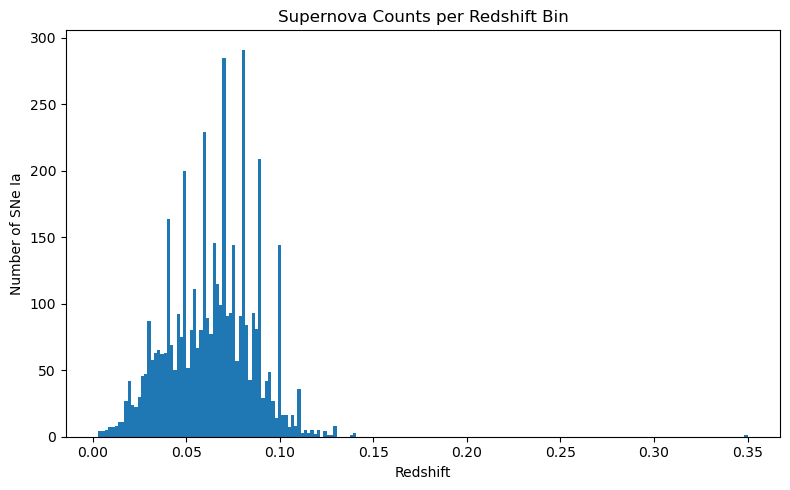

In [7]:
import pandas as pd                               # for data loading and manipulation
import matplotlib.pyplot as plt                   # for plotting

# Load the per‐bin supernova counts from the CSV file
df = pd.read_csv('/home/jovyan/research/Current/sn_counts_per_bin_with_extras.csv')

# Remove any rows where 'z_low' is NaN (these represent unbinned entries)
df = df.dropna(subset=['z_low'])

# Calculate the center of each redshift bin:
# (lower edge + upper edge) / 2
bin_centers = 0.5 * (df['z_low'] + df['z_high'])

# Calculate the width of each redshift bin:
# upper edge − lower edge
bin_widths = df['z_high'] - df['z_low']

# Create a new figure with a specified size (width=8", height=5")
plt.figure(figsize=(8, 5))

# Draw a bar chart:
# x positions at bin_centers, heights from 'sn_count', and widths from bin_widths
plt.bar(bin_centers, df['sn_count'], width=bin_widths)
plt.xlabel('Redshift')
plt.ylabel('Number of SNe Ia')
plt.title('Supernova Counts per Redshift Bin')

plt.tight_layout()
plt.show()


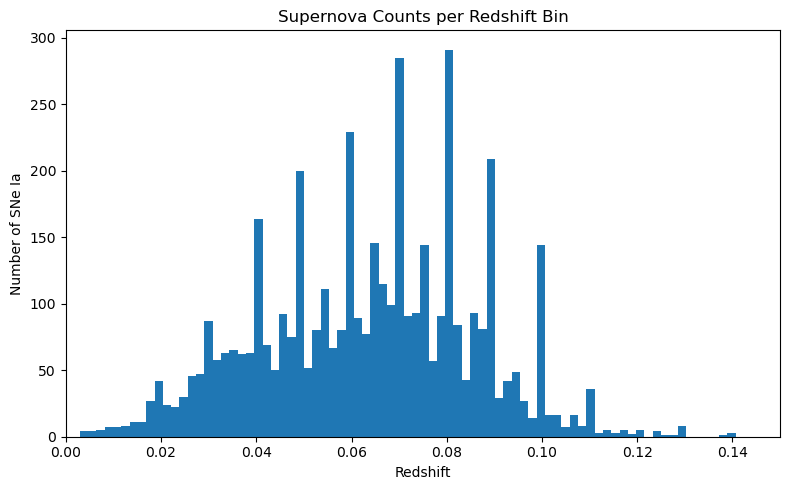

In [8]:
plt.figure(figsize=(8, 5))

# Draw a bar chart:
# x positions at bin_centers, heights from 'sn_count', and widths from bin_widths
plt.bar(bin_centers, df['sn_count'], width=bin_widths)
plt.xlabel('Redshift')
plt.ylabel('Number of SNe Ia')
plt.title('Supernova Counts per Redshift Bin')
plt.xlim(0,0.15)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd


df = pd.read_csv('diego_data.csv')
target = df[abs(df['redshift'] - 0.35) < 1e-6]
print(target)


             ZTFID      IAUID                 discdate           RA  \
3112  ZTF22aaylnhq  SN2022qmx  2022-08-01 06:07:12.000  17:35:44.32   

              Dec    peakt peakfilt  peakmag peakabs duration    rise    fade  \
3112  +04:49:56.8  1806.69        r   18.625  -22.80  >34.858  11.898  >22.96   

       type  redshift hostabs hostcol          b    A_V  
3112  SN Ia      0.35  -21.42    0.05  19.028335  0.497  


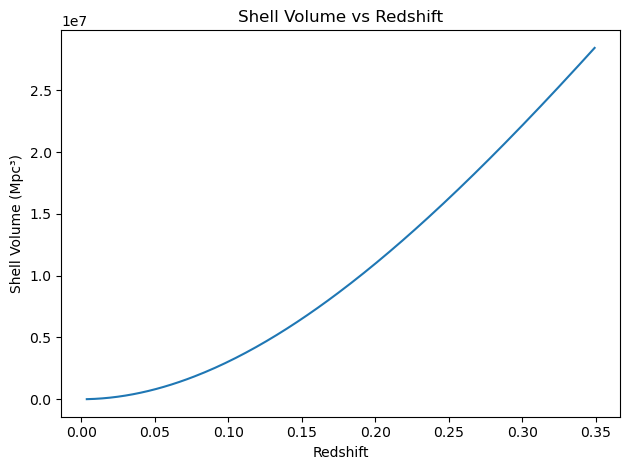

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('shell_volumes.csv')
df['z_center'] = 0.5 * (df['z_low'] + df['z_high'])


plt.figure()
plt.plot(df['z_center'], df['shell_volume_Mpc3'])
plt.xlabel('Redshift')
plt.ylabel('Shell Volume (Mpc³)')
plt.title('Shell Volume vs Redshift')
plt.tight_layout()
plt.show()


B-band (B<sub>Vega</sub>):

Dwarfs: M<sub>B</sub> > –18 mag

Giants: M<sub>B</sub> ≤ –18 mag

In [3]:
jdmin = 2458197                                      # minimum Julian Date in your window
jdmax = 2460695 # maximum Julian Date in your window
total_nights = jdmax - jdmin
print(total_nights)

2498
